In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv('Titanic-Dataset.csv')

# Displaying basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (891, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4   

In [2]:
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
print(df.describe())

# Summary statistics for categorical variables
print("\nSummary Statistics for Categorical Variables:")
print(df.describe(include=['object']))

Summary Statistics for Numerical Variables:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary Statistics for Categorical V

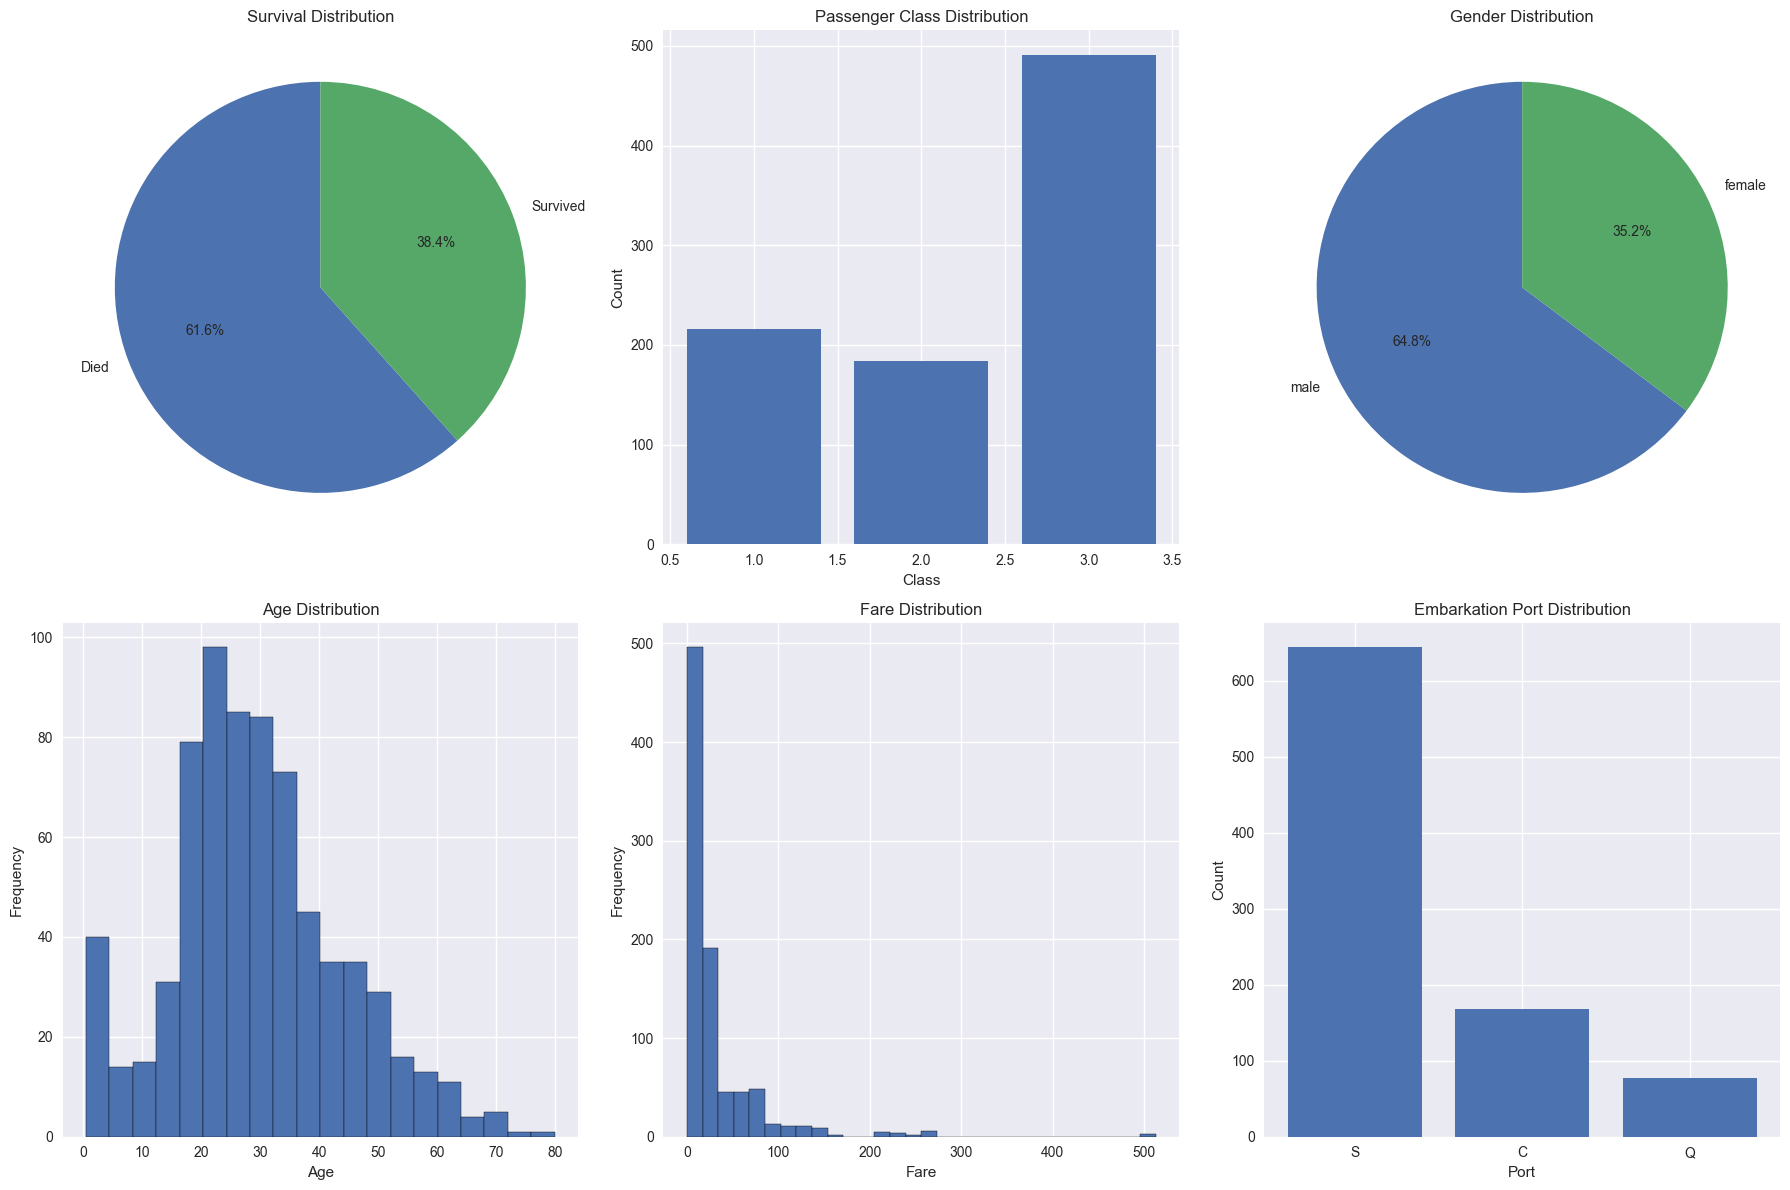

In [3]:

plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Survival distribution
survival_counts = df['Survived'].value_counts()
axes[0,0].pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Survival Distribution')

# Passenger class distribution
class_counts = df['Pclass'].value_counts().sort_index()
axes[0,1].bar(class_counts.index, class_counts.values)
axes[0,1].set_title('Passenger Class Distribution')
axes[0,1].set_xlabel('Class')
axes[0,1].set_ylabel('Count')

# Gender distribution
gender_counts = df['Sex'].value_counts()
axes[0,2].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Gender Distribution')

# Age distribution
axes[1,0].hist(df['Age'].dropna(), bins=20, edgecolor='black')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# Fare distribution
axes[1,1].hist(df['Fare'], bins=30, edgecolor='black')
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')

# Embarked distribution
embarked_counts = df['Embarked'].value_counts()
axes[1,2].bar(embarked_counts.index, embarked_counts.values)
axes[1,2].set_title('Embarkation Port Distribution')
axes[1,2].set_xlabel('Port')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

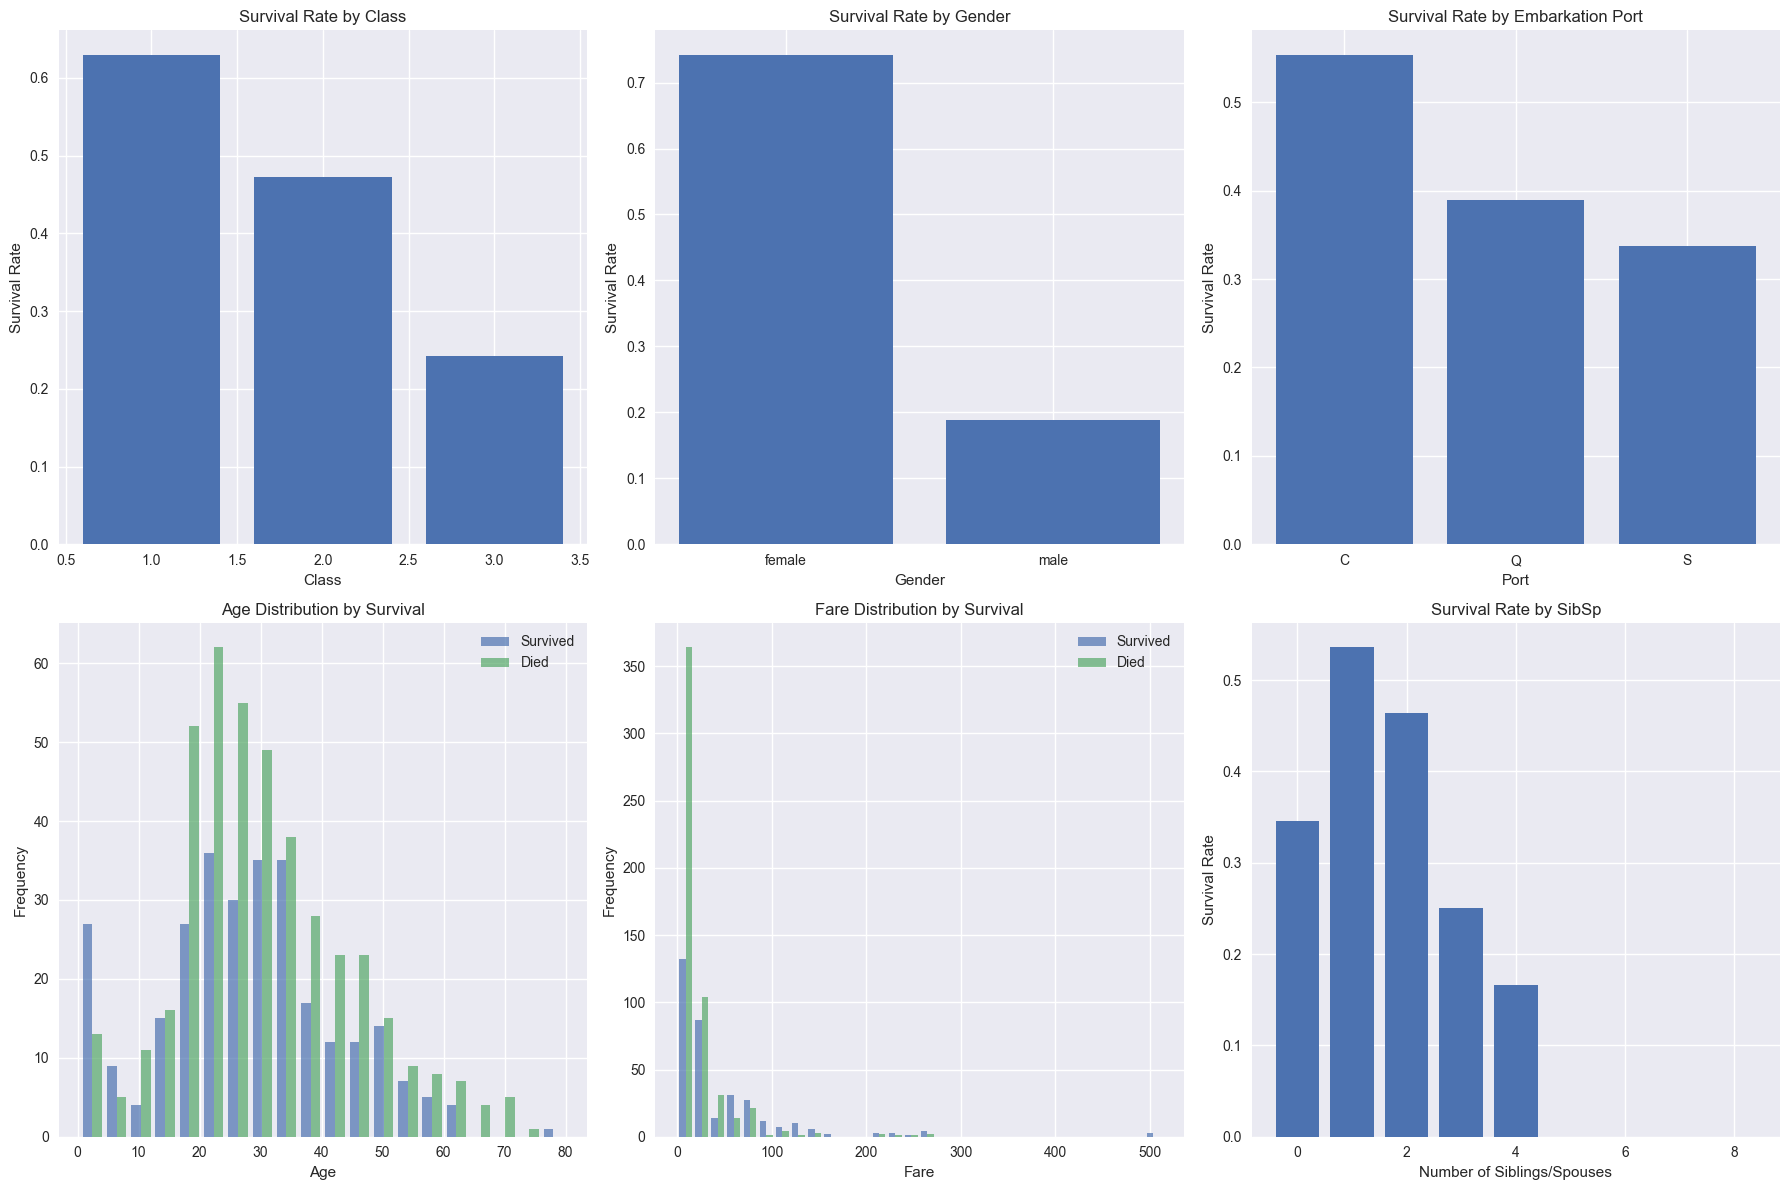

In [4]:
# Survival rate by different factors
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Survival by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
axes[0,0].bar(survival_by_class.index, survival_by_class.values)
axes[0,0].set_title('Survival Rate by Class')
axes[0,0].set_xlabel('Class')
axes[0,0].set_ylabel('Survival Rate')

# Survival by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
axes[0,1].bar(survival_by_gender.index, survival_by_gender.values)
axes[0,1].set_title('Survival Rate by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Survival Rate')

# Survival by embarkation port
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
axes[0,2].bar(survival_by_embarked.index, survival_by_embarked.values)
axes[0,2].set_title('Survival Rate by Embarkation Port')
axes[0,2].set_xlabel('Port')
axes[0,2].set_ylabel('Survival Rate')

# Age distribution by survival
survived_age = df[df['Survived'] == 1]['Age'].dropna()
died_age = df[df['Survived'] == 0]['Age'].dropna()
axes[1,0].hist([survived_age, died_age], bins=20, label=['Survived', 'Died'], alpha=0.7)
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Fare distribution by survival
survived_fare = df[df['Survived'] == 1]['Fare']
died_fare = df[df['Survived'] == 0]['Fare']
axes[1,1].hist([survived_fare, died_fare], bins=30, label=['Survived', 'Died'], alpha=0.7)
axes[1,1].set_title('Fare Distribution by Survival')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# Survival by number of siblings/spouses
survival_by_sibsp = df.groupby('SibSp')['Survived'].mean()
axes[1,2].bar(survival_by_sibsp.index, survival_by_sibsp.values)
axes[1,2].set_title('Survival Rate by SibSp')
axes[1,2].set_xlabel('Number of Siblings/Spouses')
axes[1,2].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

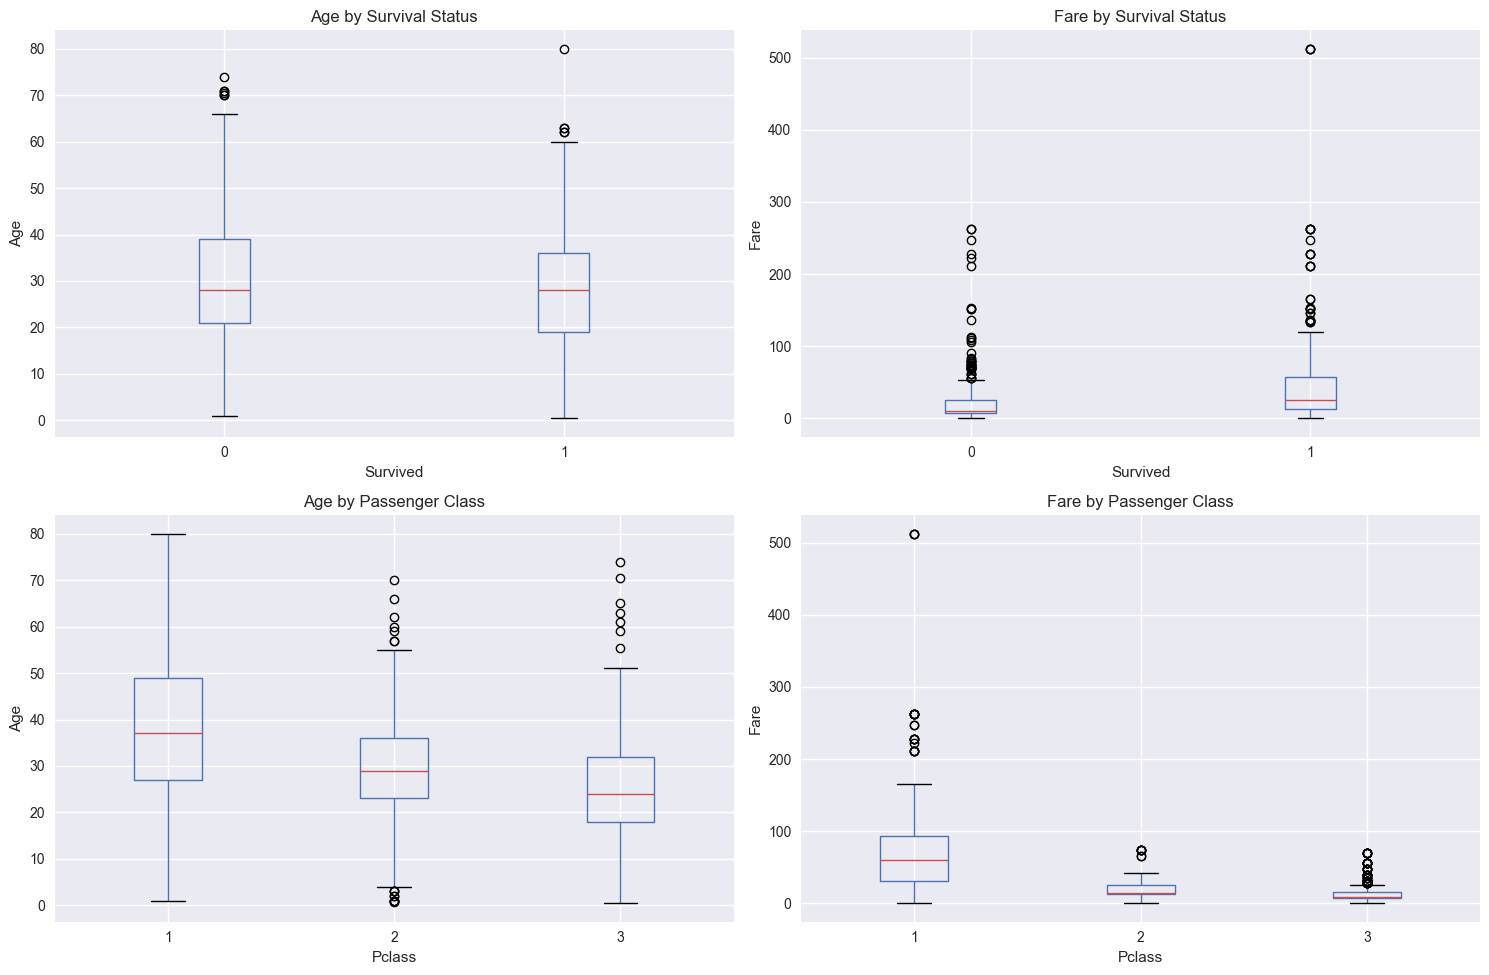

In [5]:
# Boxplots for numeric features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age by survival
df.boxplot(column='Age', by='Survived', ax=axes[0,0])
axes[0,0].set_title('Age by Survival Status')
axes[0,0].set_ylabel('Age')

# Fare by survival
df.boxplot(column='Fare', by='Survived', ax=axes[0,1])
axes[0,1].set_title('Fare by Survival Status')
axes[0,1].set_ylabel('Fare')

# Age by class
df.boxplot(column='Age', by='Pclass', ax=axes[1,0])
axes[1,0].set_title('Age by Passenger Class')
axes[1,0].set_ylabel('Age')

# Fare by class
df.boxplot(column='Fare', by='Pclass', ax=axes[1,1])
axes[1,1].set_title('Fare by Passenger Class')
axes[1,1].set_ylabel('Fare')

plt.suptitle('')  # Remove the automatic title
plt.tight_layout()
plt.show()

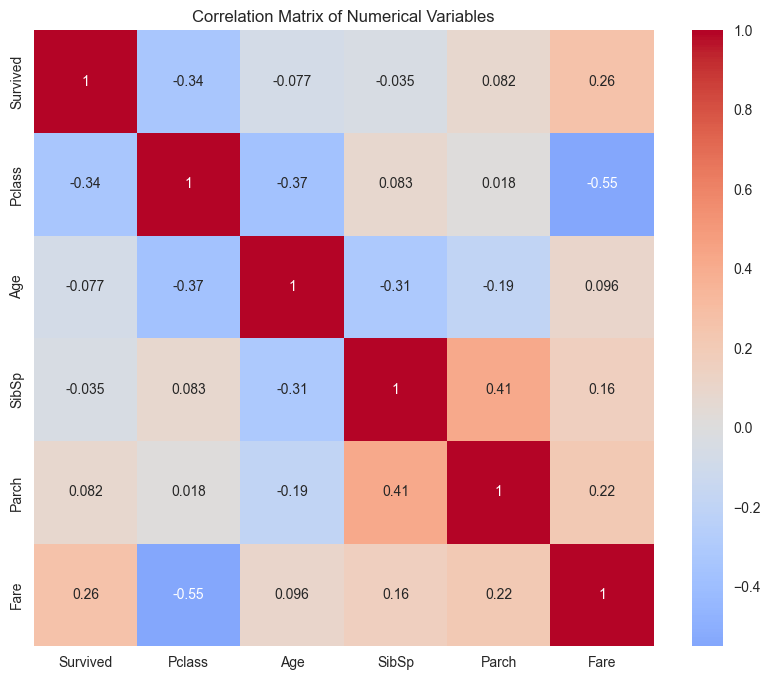

In [6]:
# Calculating correlation matrix for numerical variables
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

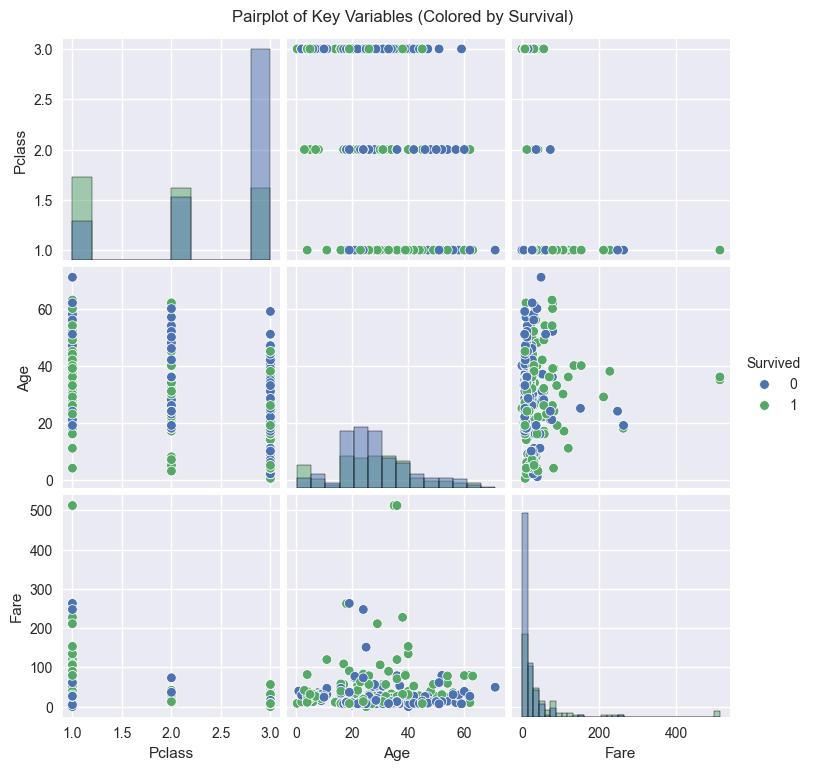

In [7]:
# Creating a pairplot for key numerical variables
# Using a sample of the data for better visualization
sample_df = df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']].dropna().sample(300, random_state=42)
sns.pairplot(sample_df, hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Key Variables (Colored by Survival)', y=1.02)
plt.show()

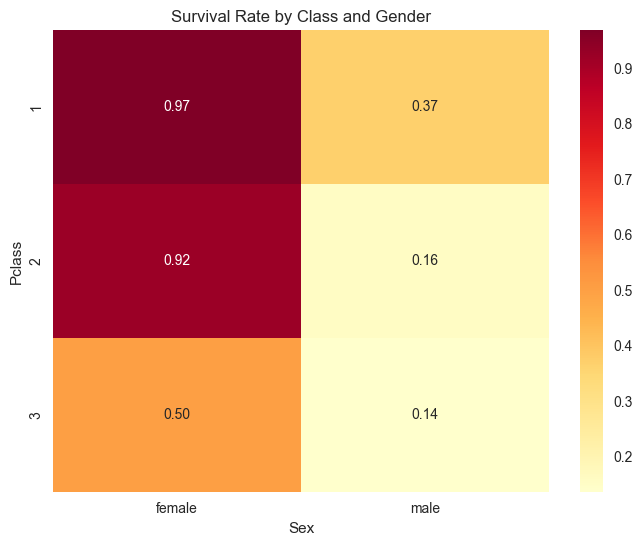

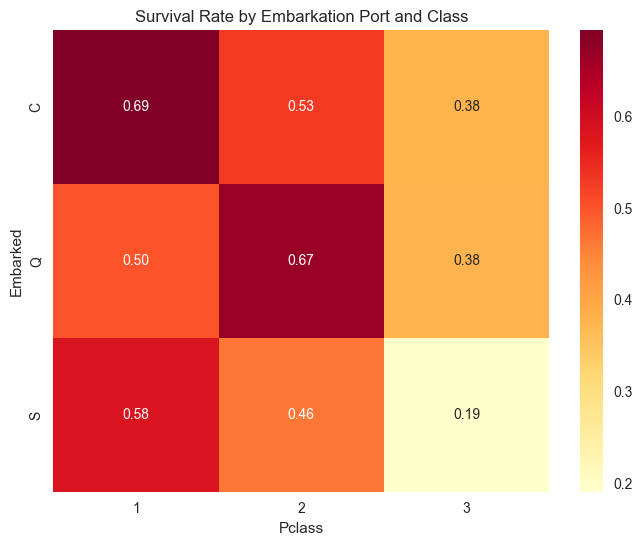

In [8]:
# Survival rates by class and gender
pivot_table = pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Survival Rate by Class and Gender')
plt.show()

# Survival rates by embarkation port and class
pivot_table2 = pd.pivot_table(df, values='Survived', index='Embarked', columns='Pclass', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table2, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Survival Rate by Embarkation Port and Class')
plt.show()

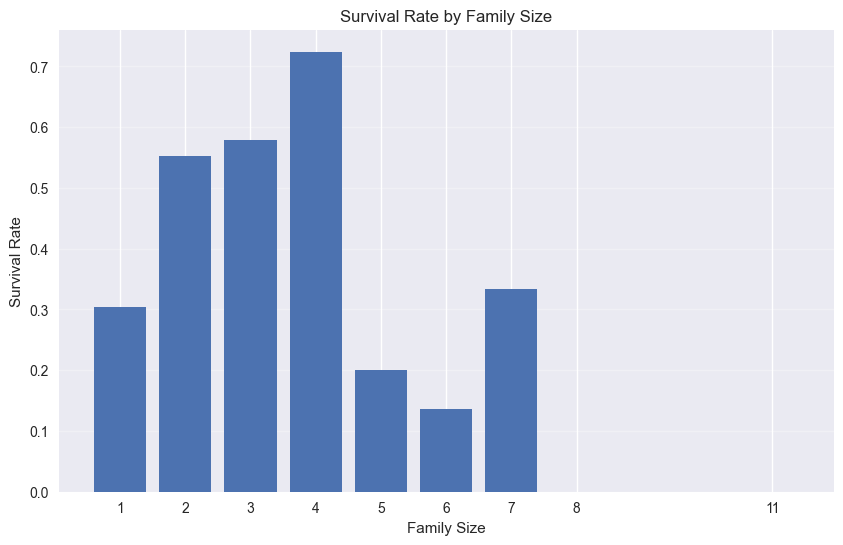

In [9]:
# Creating a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Survival rate by family size
family_survival = df.groupby('FamilySize')['Survived'].mean()

plt.figure(figsize=(10, 6))
plt.bar(family_survival.index, family_survival.values)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(family_survival.index)
plt.grid(axis='y', alpha=0.3)
plt.show()